In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Final_Data.csv')

In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,99.0,...,38.0,6000.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.6,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,4.4,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [4]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0
399,58.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,131.0,...,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,0


In [5]:
y=df['classification']
df=df.drop("classification",axis=1)

In [6]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,99.0,...,11.3,38.0,6000.0,3.9,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,9.6,31.0,7500.0,4.6,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,4.4,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,11.6,35.0,7300.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,15.7,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,16.5,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,15.8,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,14.2,41.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [8]:
X=df.copy()
df.size

9600

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
model = LogisticRegression()
X_train.shape

(300, 24)

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(300, 24)

E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix:


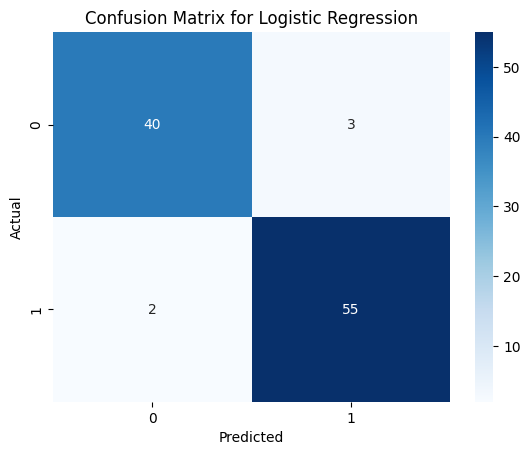

Model: Decision Tree
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:


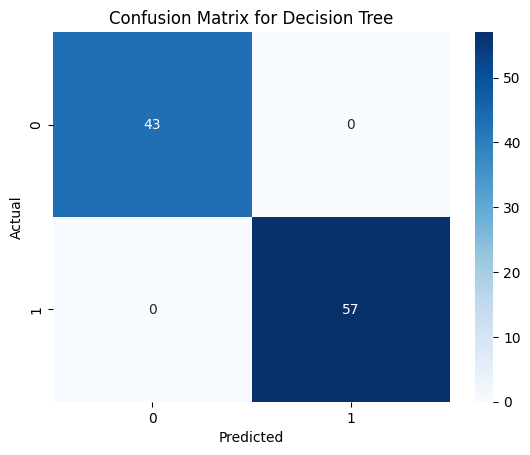

Model: Random Forest
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        57

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:


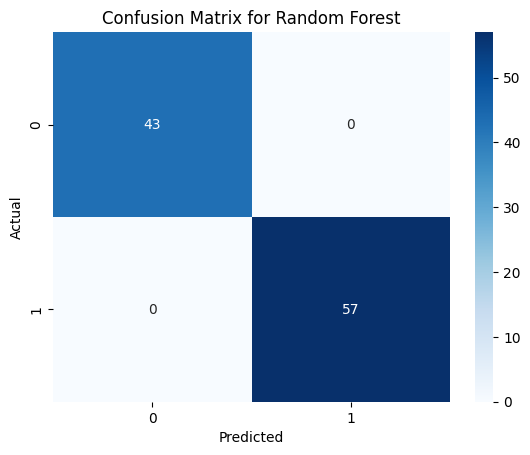

Model: SVM
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.57      1.00      0.73        57

    accuracy                           0.57       100
   macro avg       0.28      0.50      0.36       100
weighted avg       0.32      0.57      0.41       100

Confusion Matrix:


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


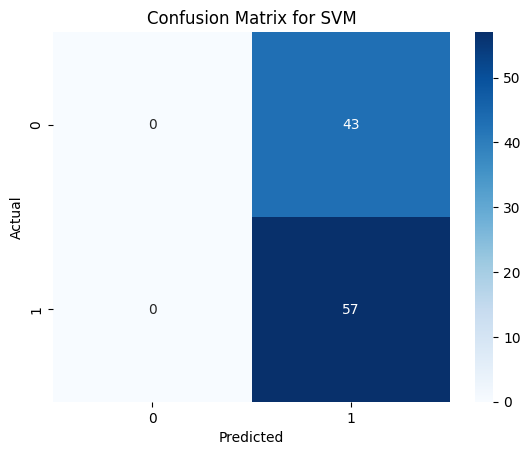

In [13]:
# Initialize the models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier()
rforest = RandomForestClassifier()
svm = SVC()

# Train the models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rforest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rforest = rforest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
predictions = [y_pred_logreg, y_pred_dtree, y_pred_rforest, y_pred_svm]

for model, y_pred in zip(models, predictions):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Logistic regression seems appropriate

In [14]:
# Compare the models
results = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, y_pred_logreg),
                 accuracy_score(y_test, y_pred_dtree),
                 accuracy_score(y_test, y_pred_rforest),
                 accuracy_score(y_test, y_pred_svm)]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy
0  Logistic Regression      0.95
1        Decision Tree      1.00
2        Random Forest      1.00
3                  SVM      0.57


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Assuming you have your data prepared (X_train, X_test, y_train, y_test)

# Define the logistic regression model
model = LogisticRegression(max_iter=5000)

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']  # Solvers to try
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance using metrics (accuracy, precision, etc.)

# Print the best parameters found
print("Best parameters:", best_params)


Best parameters: {'C': 100, 'solver': 'lbfgs'}


(100, 24)
1.0
Confusion Matrix:


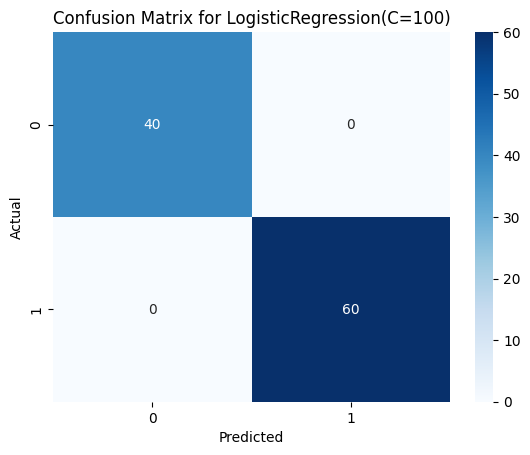

In [13]:
from sklearn.linear_model import LogisticRegression

# Assuming you have your data prepared (X_train, X_test, y_train, y_test)

# Create the logistic regression model with the best parameters
model = LogisticRegression(C=100, solver='lbfgs')

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(X_test.shape)
print(accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {model}")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate the model performance using metrics (accuracy, precision, etc.)


In [14]:
# Open a file in write-binary mode
with open('kidney_logistic_regression.pkl', 'wb') as f:
  # Dump the trained model object using pickle.dump
  pickle.dump(model, f)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data as X and target variable as y

# Split data into training and testing sets (adjust test_size as needed)


# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [4, 6, 8],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features considered at each split
}

# Create a RandomizedSearchCV object (adjust n_iter for more exploration)
search = RandomizedSearchCV(rf_model, param_grid, cv=5, n_iter=100, scoring='accuracy')

# Fit the search object (trains with cross-validation)
search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = search.best_estimator_
best_params = search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance (accuracy in this case)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the best parameters found
print("Best parameters:", best_params)


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda\envs\tensorflow\

Accuracy: 1.0
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8}


In [16]:

# Define the Random Forest model with the best parameters
rf_model2 = RandomForestClassifier(n_estimators=300, min_samples_split=5,
                              min_samples_leaf=2, max_features='sqrt', max_depth=8)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix_result)

# Classification Report (including precision, recall, F1-score, etc.)
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

# Additional Scores (you can choose based on your problem)
# - Precision (for each class)
# - Recall (for each class)
# - F1-score (for each class)
# - ROC AUC score (for imbalanced datasets)

# Print additional scores if needed (example: F1-score)
# from sklearn.metrics import f1_score
# f1 = f1_score(y_test, y_pred, average='macro')  # Or 'micro' or weighted average
# print("F1-score (macro):", f1)
print(X_test.shape)
print(y_test.shape)

Accuracy: 1.0
Confusion Matrix:
 [[40  0]
 [ 0 60]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        60

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

(100, 24)
(100,)


In [22]:
with open('kidney_random_forest.pkl', 'wb') as f:
  # Dump the trained model object using pickle.dump
  pickle.dump(model, f)